# Week 1 

The purpose of this week's excercise is twofold: First, introduce you to Numpy and making you familiar to the library and some of its pitfalls. Secondly, you will use this knowledge to estimate the linear model using OLS.

## A short introduction to Numpy and Linear Algebra (Linalg)
First, import all necessary packages. If you are missing a package, you can either install it through your terminal using pip, or an Anaconda terminal using conda.

In [2]:
import numpy as np
from numpy import linalg as la
from numpy import random as random
from tabulate import tabulate
#(NB if you havent got tabulate yet, install it using pip install tabulate)
from matplotlib import pyplot as plt

### Entering matrices manually
To create a $1\times9$ *row* vector write,

In [3]:
row = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(row)

[1 2 3 4 5 6 7 8 9]


To create a $9\times1$ *column* vector write,

In [4]:
col = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9]])
print(col)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


An easier method is to define a row vector, and transpose it. Notice the double [[]]. Try to see what happens if you transpose a row vector using only [].

In [5]:
col = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9]]).T
print(col)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


**A short note on numpy vectors**
Numpy does not treat vectors and matrices the same. A *true* numpy vector has the shape (k,), . The shape of a numpy array is an attribute, how do you call this attribute for the `row` and `col` arrays? What is the shape of the `row.T` array? 

In [6]:
# Call the shape attribute for the row and col vars. Check the shape of row.T

# FILL IN HERE

a = np.array([[1,2],[3,4]])
v = np.array([1,2,3])

v.shape

(3,)

To create a matrix, you combine what you have learned to manually create a $3 \times 3$ matrix called x, that has the numbers 0 to 8.

In [7]:
# FILL IN HERE

x = np.array([[0,1,2],[3,4,5],[6,7,8]])

x


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Create the same $3 \times 3$ using `np.arange()` and np.reshape()

In [8]:
# FILL IN HERE

X = np.arange(9)

X = x.reshape((3,3))

X.shape

X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Matrix calculations 
There are several types of matrix calculations available to us with the numpy library, and we will introduce some here.

For matrix **multiplication** you can for the matrices `a` and `b` use `a@b`, `np.dot(a, b)` or `a.dot(b)`

Use the `row`, `col` vectors and `x` matrix and perform these matrix multiplications. Does the `row` vector behave as you would expect?

In [9]:
# FILL IN HERE

aa = row@col
aaa = np.dot(row, col)
aaaa = row.dot(col)

print("Row:", row)
print("Col:", col)

print("row@col:", aaaa)


Row: [1 2 3 4 5 6 7 8 9]
Col: [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
row@col: [285]


What happens if you use `/` and `*` operators with the  `row` and `col` vectors or the `x` matrix?

In [10]:
# FILL IN HERE

mm = x*x


In [11]:
# FILL IN HERE

For OLS we need to be able to calculate the inverse. This is done with the `linalg` submodule. Create a new matrix that we can calculate the inverse on. Why can't we take the inverse of `x`?

In [12]:
# FILL IN HERE

matrix = np.array([[0,1,2],[3,4,5],[6,7,8]])
# la.inv(matrix) # linalg imported as la

# Matricen har ikke fuld rank - se celle neden under (også hvis determinaten er nul! man kan jo ikke dividere med nul)


We cannot take the inverse of `x`, what do we normaly need to check before we take the inverse? What `numpy.linalg` method can we use to help us check for this?

In [13]:
# FILL IN HERE

la.matrix_rank(matrix)

# matricen har rank = 2, hvilket betyder at den ikke har fuld rank 

2

Scalar operations can be performed as usual with `*` and `/`, and behaves as expected.

In [14]:
a = np.array([[4, 9], [1, 3]])
print(a/2)
print(a*2)

[[2.  4.5]
 [0.5 1.5]]
[[ 8 18]
 [ 2  6]]


### Stack vectors or matrices together
If you have several 1-D vectors (has the shape (k,)), you can use `np.column_stack()` to get a matrix with the input vectors put together as column.

If you have matrices (or arrays) that are multidimensional (have the shape (k, t)), you can use `np.hstack()` (means horizontal stack). This is very useful if you already have a matrix, and you want to add a vector.

Try to make a matrix with two `row` vectors, this should give you a $9 \times 2$ vector.

Make a new vector, and add it to the `x` matrix. This should then be a $3 \times 4$ matrix

In [15]:
# FILL IN HERE

np.column_stack((row,row))

new_vector = np.array([0,0,0])

np.column_stack((x,new_vector))



array([[0, 1, 2, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 0]])

### Other methods that you need to know.
The numpy library is vast. Some other methods that are useful are `ones`, `diag`, `diagonal`, `eye`.

## Exercise 1 - Data generation
### 1.1 
Create a synthetic dataset with the following characteristics

\begin{align}
    y_i &= \beta_0 + x_{1i}\beta_1 + x_{2i}\beta_2 + \varepsilon_i
\end{align}

where $\beta_0=1$, $\beta_1 = -0.5$, $\beta_2 = 2$, $x_{1i} \sim \mathcal{N}(0, 4)$, $x_{2i} \sim \mathcal{N}(5, 9)$, $\varepsilon_i \sim \mathcal{N}(0, 1)$, and where $i = 0, ..., 99$. <br>
The code may look something like this:

In [20]:
# Create a seed to always have identical draws.
seed = 42
# Instance a random number generator using this seed.
rng = random.default_rng(seed=seed)
n = 100
betas = np.array([1, -0.5, 2]).reshape(-1, 1)

# Make random draws from a normal distribution.
def random_draws(n):
    x0 = np.ones(n) # FILL IN HERE
    x1 = rng.normal(0, 4, n) # np.array([rng.normal(0,4) for i in range(n)]) # FILL IN HERE
    x2 = rng.normal(5, 9, n) # np.array([rng.normal(5,9) for i in range(n)])# FILL IN HERE
    eps = rng.normal(0, 1, n).reshape(-1, 1) # np.array([rng.normal(0,1) for i in range(n)]) # FILL IN HERE
    
    # Stack the single columns into a matrix, return
    # the matrix along with eps.
    return np.column_stack((x0,x1,x2)), eps # FILL IN HERE, eps

x, eps = random_draws(n)

# Create y using the betas and X.
y = x@betas + eps # FILL IN HERE
print(y.shape) # does y have the dimensions you expect?

# To get what I expected write:
# y = x @ betas.flatten() + eps 



(100, 1)


### 1.2 
Imagine that you had not generated the dataset yourself, but that you were given a similar data set that was already collected (generated) and ready to analyze. What would you observe and not observe in that data set?

## Exercise 2 - OLS
### 2.1
Make sure that you remember the mathematical equation for the OLS estimation, which we will later use to estimate the beta coefficients using date from the previous excercise. <br> 
**Write out the OLS estimator in matrix form:**


$\hat{\boldsymbol{\beta}} = \text{Fill in here} $ 

$$\boldsymbol{\hat{\beta}} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X'}\mathbf{y}$$

*Hint: Look it up on p.53 in Wooldridge*

### 2.2
As you might remember, to perform inference on the OLS estimators, we need to calculate the standard errors for the previously estimates OLS coefficients. Again, make sure you remember its equation, *and write up the OLS standard errors in matrix form:*

$\mathbf{\widehat{Var(\boldsymbol{\hat{\beta}})}} = \hat{\sigma}^2 (\mathbf{X'}\mathbf{X)^{-1}}$, for $\hat{\sigma}^2 = \frac{SSR}{N - K}$, <br>

where $SSR = \sum_{i=0}^{N - 1} {\hat{u}}^2_i$, N is the number of observations, and K is the number of explanatory variables including the constant.

*Hint: Look it up on p.55 in Wooldridge* <br>
*Hint: Remember that the variance is a function of $\hat{\sigma}^2$, which is calculated using SSR*

### 2.3
Estimate $\boldsymbol{\hat{\beta}}$ from the synthetic data set. Furthermore, calculate standard errors and t-values (assuming that the assumptions of the classical linear regression model are satisfied). The code may look something like this:

In [23]:
def ols_estimation(y, x):
    # Make sure that y and x are 2-D.
    y = y.reshape(-1, 1)
    if len(x.shape)<2:
        x = x.reshape(-1, 1)

    # Estimate beta
    b_hat =  la.inv((x.T@x))@(x.T@y) # Fill in here

    # Calculate standard errors
    residual = y - x@b_hat # Fill in here
    sigma = residual.T@residual/(n - betas.size) # Fill in here
    cov = sigma * la.inv(x.T@x) # Fill in here
    se = np.sqrt(cov.diagonal()).reshape(-1, 1)  # The diagonal method returns 1d array. # Fill in here

    # Calculate t-values
    t_values = b_hat / se # Fill in here
    return b_hat, se, t_values

b_hat, se, t_values = ols_estimation(y, x)

Python stores vectors as one-dimensional rather than two-dimensional objects. This can sometimes cause havoc when we want to compute matrix products. Compute the outer and inner products of the residuals from above using np.inner() and np.outer(). Compare these with your computed outer and inner products when using matrix multiplication @. When computing outer and inner products of a column vector, a, recall that a'a is the inner product and aa' is the outer product.

In [26]:
res = y - x@b_hat # FILL IN HERE
print(res.shape)
outer = np.outer(res,res) # FILL IN HERE
inner = np.inner(res,res) # FILL IN HERE
matmul_inner = res.T@res# FILL IN HERE
matmul_outer = res@res.T# FILL IN HERE
print(inner.shape)
print(outer.shape)
print(matmul_inner.shape)
print(matmul_outer.shape)
print(np.sum(np.diag(inner)))
matmul_inner

(100, 1)
(100, 100)
(100, 100)
(1, 1)
(100, 100)
103.88122746346109


array([[103.88122746]])

Now if we flatten the residuals to be stored in Python's default mode (i.e. one-dimensional) what happens?

In [28]:
res=res.flatten()
print(res.shape)
outer = np.outer(res,res) # FILL IN HERE (same as above)
inner = np.inner(res,res) # FILL IN HERE (same as above)
matmul_inner = res.T@res # FILL IN HERE (same as above)
matmul_outer = res@res.T # FILL IN HERE (same as above)
print(inner.shape)
print(outer.shape)
print(matmul_inner.shape)
print(matmul_outer.shape)
matmul_outer
# key: np.inner and np.outer treat vectors as one dimensional i.e. (k,) whilst @ treats vectors as two dimensional matrices (k,1)
# be careful to use the right operand when computing inner and outer products :)

(100,)
()
(100, 100)
()
()


103.8812274634611

I have written a code to print a table, using the `tabulate` package. You will need to add the row names for this code to work - each row contains a information about the different coefficients on the explanatory variables.

In [32]:
def print_table(row_names, b, b_hat, se, t_values):
    table = []

    # Make a list, where each row contains the estimated and calculated values.
    for index, name in enumerate(row_names):
        table_row = [
            name, b[index], b_hat[index], se[index], t_values[index]
        ]
        table.append(table_row)

    # Print the list using the tabulate class.
    headers = ['', '\u03b2', '\u03b2\u0302 ', 'Se', 't-value']
    print('OLS Estimates:\n')
    print(tabulate(table, headers, floatfmt=['', '.1f', '.3f', '.3f', '.1f']))

row_names = ['b_0', 'b_1', 'b_2'] # Fill in here
print_table(row_names, betas, b_hat, se, t_values) # Fill in here

OLS Estimates:

        β      β̂      Se    t-value
---  ----  ------  -----  ---------
b_0   1.0   0.929  0.119        7.8
b_1  -0.5  -0.503  0.034      -14.9
b_2   2.0   2.002  0.012      168.9


Alternatively, you can print a table which you can paste straight into latex using the following code. This uses panda data frames  which we'll cover next week.

In [33]:
import pandas as pd
dat = pd.DataFrame(zip(betas,b_hat.round(4),se.round(4),t_values.round(4)))
dat.columns = ['\u03b2','\u03b2\u0302','se','t-values']
dat.index = ['beta1','beta2','beta3']
print(dat.style.to_latex())

\begin{tabular}{lllll}
 & β & β̂ & se & t-values \\
beta1 & [1.] & [0.9294] & [0.1192] & [7.797] \\
beta2 & [-0.5] & [-0.5027] & [0.0336] & [-14.9481] \\
beta3 & [2.] & [2.0016] & [0.0119] & [168.8937] \\
\end{tabular}



## Exercise 3 - a simple Monte Carlo Experiment
Carry out a Monte Carlo experiment with $S = 200$ replications and $N = 100$ observations to check if the OLS estimator provides an unbiased estimate of $\boldsymbol{\beta}$
### 3.1
Generate 200 data sets similar to what you did in exercise 1, and estimate $\boldsymbol{\beta}$ on each of them.

*Hint:* Start by making prefilling two arrays using `np.zeros`, one array to store the estimated beta coefficients, and one to store the estimated standard errors. What shape should these arrays have?

Then make a loop where each loop makes a random draw, and then estimates on this random draw. And finally stores the estimated coefficients and standard errors.

In [38]:
# Initialize the variables and lists
s = 200
n = 100

# Allocate memory for arrays to later fill
b_coeffs = np.zeros((s, betas.size))
b_ses = np.zeros((s, betas.size))

for i in range(s):
    # Generate data
    x, eps = random_draws(n) # Fill in here
    y = x@betas + eps # Fill in here

    # Estimate coefficients and variance
    b_hat, se, t_values = ols_estimation(y,x) # Fill in here

    # Store estimates
    b_coeffs[i, :] = b_hat.T # Fill in here
    b_ses[i, :] = se.T # Fill in here

# Make sure that there are no more zeros left in the arrays.
assert np.all(b_coeffs) and np.all(b_ses), 'Not all coefficients or standard errors are non-zero.'

### 3.2
Do the following three calculations:
- Calculate the means of the estimates (means across simulations)
- Calculate the means of the standard errors (means across simulations)
- Calculate the standard error of the MC estimates

In [45]:
mean_b_hat = np.mean(b_coeffs, axis=0) # Fill in here
mean_b_se = np.mean(b_ses, axis=0) # Fill in here
mean_mc_se = np.sqrt((np.sum(
    (b_coeffs - np.mean(b_coeffs, axis=0))*(b_coeffs - np.mean(b_coeffs, axis=0)), axis=0)/(s - 1)
)) # Fill in here

In [46]:
print(betas.T)
print(mean_b_hat)
print(mean_b_se)
print(mean_mc_se)

[[ 1.  -0.5  2. ]]
[ 1.00164271 -0.50142881  1.99866145]
[0.11615686 0.02561331 0.01128654]
[0.10904839 0.02626048 0.01174088]


### 3.3
Draw a histogram for the 200 estimates of $\beta_1$

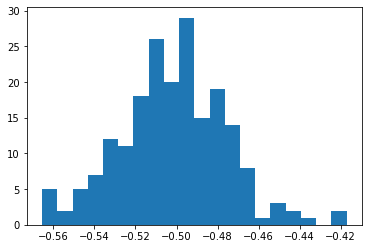

In [49]:
# Fill in here

# Use matplotlib to plot the histogram. If you use jupyter notebook, include ";" to force
# the notebook to not print the return value (the plt method also returns the two arrays it
# use to plot the histogram, but we do not always want to see these).
plt.hist(b_coeffs[:, 1], bins=20) ; 